In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#supress warnings
import warnings
warnings.filterwarnings("ignore")

#Environment settings
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)
pd.set_option("display.width", None)

## Data Inspection

In [2]:
#Reading dataset

df_leads = pd.read_csv("/content/Leads.csv")

In [3]:
df_leads.head()

Prospect ID  Lead Number              Lead Origin     Lead Source  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission          Google   

  Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0           No          No          0          0.0                            0   
1           No          No          0          5.0                          674   
2           No          No          1          2.0                         1532   
3           No          No          0          1.0                          305   
4           No          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity Country           Specialization  \
0                   0.0  Page Visited on Website     NaN                   Select   
1                   2.5             Email Opened   India                   Select   
2                   2.0             Email Opened   India  Business Administration   
3                   1.0              Unreachable   India    Media and Advertising   
4                   1.0        Converted to Lead   India                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Magazine Newspaper Article  \
0                       Better Career Prospects     No       No                No   
1                       Better Career Prospects     No       No                No   
2                       Better Career Prospects     No       No                No   
3                       Better Career Prospects     No       No                No   
4                       Better Career Prospects     No       No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  Receive More Updates About Our Courses                                 Tags      Lead Quality  \
0                                     No          Interested in other courses  Low in Relevance   
1                                     No                              Ringing               NaN   
2                                     No  Will revert after reading the email          Might be   
3                                     No                              Ringing          Not Sure   
4                                     No  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City  \
0                                No                        No          Select  Select   
1                                No                        No          Select  Select   
2                                No                        No  Potential Lead  Mumbai   
3                                No                        

In [4]:
# Checking shape of dataframe

df_leads.shape

(9240, 37)

In [5]:
# Checking stats for numerical columns

df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000   
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820   
std     23405.995698     0.486714     4.854853                   548.021466              2.161418   
min    579533.000000     0.000000     0.000000                     0.000000              0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000   
50%    615479.000000     0.000000     3.000000                   248.000000              2.000000   
75%    637387.250000     1.000000     5.000000                   936.000000              3.000000   
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000   

       Asymmetrique Activity Score  Asymmetrique Profile Score  
count                  5022.000000                 5022.000000  
mean                     14.306252                   16.344883  
std                       1.386694                    1.811395  
min                       7.000000                   11.000000  
25%                      14.000000                   15.000000  
50%                      14.000000                   16.000000  
75%                      15.000000                   18.000000  
max                      18.000000                   20.000000

In [6]:
# Checking info

df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- There are null values in dataset.

## Data Cleaning

### Treatment for 'Select' values
As mentioned in the Problem Statement, many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. One of the reason might be is that the customer did not select any option from the list and hence for such columns the data remained as default 'Select' for Select.

In [7]:
# Columns having select values

cols_select=[col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_select)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [8]:
# Replacing select values with NaN

df_leads = df_leads.replace('Select',np.nan)

In [9]:
# Reinspecting select values

cols_select=[col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_select)

[]


- 'Select' values are handled as per the requirement.

### Missing Values

In [10]:
## Calculating percentage of missing values

missing_perc = (df_leads.isnull().sum()/len(df_leads)*100).sort_values(ascending=False)

In [11]:
missing_perc

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

- Drop columns having null values greater than 40%.

In [12]:
# Columns to drop

cols_drop = missing_perc[missing_perc>=40].index.to_list()
cols_drop

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index']

In [13]:
# Dropping Columns

df_leads.drop(cols_drop,axis=1,inplace=True)

In [14]:
df_leads.shape

(9240, 30)

In [15]:
# Inspecting percentage of null values in remaining columns

(df_leads.isnull().sum()/len(df_leads)*100).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

#### Categorical columns

In [16]:
cat_cols = ["City","Specialization","Tags",'What matters most to you in choosing a course','What is your current occupation','Country','Last Activity','Lead Source']

In [17]:
# Inspecting value counts percentage in categorical columns

for cols in cat_cols:
        perc=100*df_leads[cols].value_counts(normalize=True)
        print("value_counts % for :",cols,"\n")
        print(perc,"\n")
        print("_ _ _"*20,"\n")

value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

_ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ _ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2

**Insights:**

- **City:** There are 39.71 % missing values and cannot be replaced with mode i.e, Mumbai as it will make data more skewed. Hence, the column can be dropped.

- **Specialization:** Specialization has 36.58 % missing values but variable seems to be important as per business requiremnet. Hence, imputation or dropping is not a good choice. Therefore, We need to create additional category called 'Others'.

- **Tags:** There are 36.29 % missing values. It only represents current status of lead and it can be dropped.

- **What matters most to you in choosing a course:** The variable has 29.32 % missing values and 99.95% customers have selected 'better career prospects'. Hence, the data is skewed and will not provide any insight, so we can drop this column.

- **What is your current occupation:** Impute the missing values with 'Unemployed' as it is the most occuring response. The variable is also  important in business context as X Education sells online courses and unemployed people might take this course to increase their chances of getting employed.

- **Country:** Approximately 96% of the customers are from India. Since there is skewness, the Country column can be dropped.

- **Last Activity:** Since, there are only 1.11% of missing values, we can impute the missing values with mode i.e, 'Email Opened'.

- **Lead Source:** Since, there are only 0.39% of missing values, we can impute the missing values with mode i.e, 'Google'. Also, we need to replace 'google'  with 'Google'.

**Dropping columns based on insights**

- 'City'
- 'Tags'
- 'What matters most to you in choosing a course'
- 'Country'

In [18]:
df_leads.drop(['City','Tags','What matters most to you in choosing a course','Country'],axis=1,inplace=True)

In [19]:
df_leads.shape

(9240, 26)

**Imputing column values based on insights**

- 'Specialization'
- 'Lead Source'
- 'Last Activity'
- 'What is your current occupation'

In [20]:
missing_values = {'Specialization':'Others','Lead Source':'Google', 'Last Activity':'Email Opened','What is your current occupation':'Unemployed'}
df_leads = df_leads.fillna(missing_values)

**Replacing 'google' with 'Google'**

In [21]:
df_leads['Lead Source'] = df_leads['Lead Source'].replace('google','Google')

In [22]:
df_leads['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

**Reinspecting missing values**

In [23]:
df_leads.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                   0
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                                 0
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses  

#### Numerical columns

Since, the missing values are only 1.48% in both numerical columns, we can impute them with mean or mode based on the statistics of the columns.

**TotalVisits**

In [24]:
df_leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [25]:
df_leads['TotalVisits'].value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [26]:
# Imputing TotalVisits missing values with mode as the value should be whole number and there is not much difference in both mean and mode.

df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace = True)

**Page Views Per Visit**

In [27]:
df_leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [28]:
df_leads['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [29]:
# Imputing TotalVisits missing values with mode.

df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0],inplace=True)

**Rechecking null values**

In [30]:
df_leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 

- There are no missing values left in the dataset.

### Removing Unwanted Columns

#### Columns with only one unique value

In [31]:
df_leads.describe(include = 'object')

Prospect ID              Lead Origin Lead Source Do Not Email  \
count                                   9240                     9240        9240         9240   
unique                                  9240                        5          20            2   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission      Google           No   
freq                                       1                     4886        2909         8506   

       Do Not Call Last Activity Specialization What is your current occupation Search Magazine  \
count         9240          9240           9240                            9240   9240     9240   
unique           2            17             19                               6      2        1   
top             No  Email Opened         Others                      Unemployed     No       No   
freq          9238          3540           3380                            8290   9226     9240   

       Newspaper Article X Education Forums Newspaper Digital Advertisement  \
count               9240               9240      9240                  9240   
unique                 2                  2         2                     2   
top                   No                 No        No                    No   
freq                9238               9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       I agree to pay the amount through cheque A free copy of Mastering The Interview  \
count                                      9240                                   9240   
unique                                        1                                      2   
top                                          No                                     No   
freq                                       9240                                   6352   

       Last Notable Activity  
count                   9240  
unique                    16  
top                 Modified  
freq                    3407

- Columns having one unique value sholud be dropped.

In [32]:
# Dropping columns having one unique value

cols_to_drop = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
df_leads.drop(cols_to_drop,axis=1,inplace=True)
df_leads.shape

(9240, 21)

#### Removing addditional columns

There are certain columns which can be removed as they will not be required and hence, to be removed.

In [33]:
# Dropping Columns

df_leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)

In [34]:
df_leads.shape

(9240, 18)

#### Inspecting and Dropping Skewed categorical columns

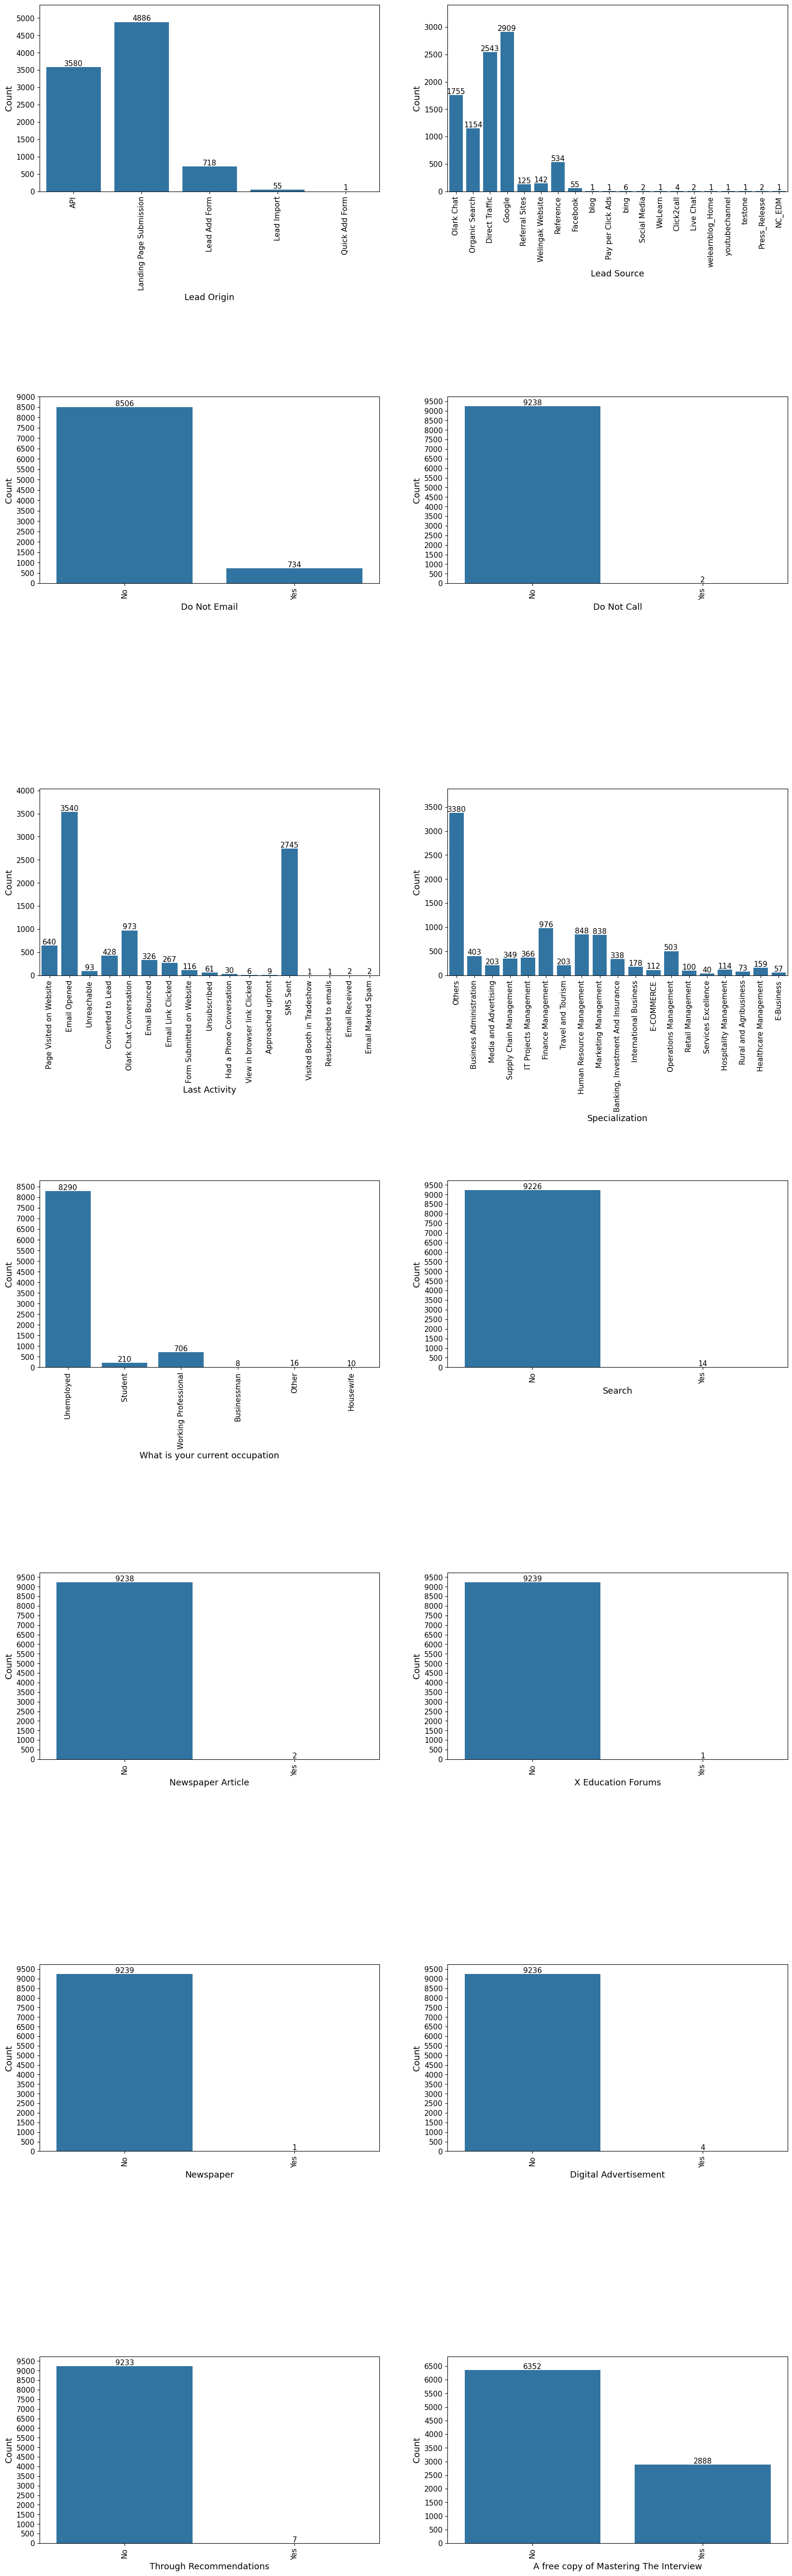

In [35]:
# plotting countplot for categorical columns to get data distribution

categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(20, 100))
plt.subplots_adjust(wspace=.2, hspace=1.1)

for i, col in enumerate(categorical_col):
    plt.subplot(10, 2, i+1)
    ax = sns.countplot(x=col, data=df_leads, orient='v')
    plt.xticks(rotation=90, fontsize=11)
    plt.yticks(fontsize=11)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('Count', fontsize=13)

    max_height = 0
    for p in ax.patches:
        if p.get_height() > max_height:
            max_height = p.get_height()

        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=11)

    ax.set_ylim([0, max_height + 500])
    ax.set_yticks(np.arange(0, max_height + 500, 500))

plt.show()

**Insight**

- 'Do Not Call',
- 'Search',
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper',
- 'Digital Advertisement',
- 'Through Recommendations'

These columns will be dropped as the data is skewed and can affect the performance of logistic regression models, and can lead to biased or inaccurate parameter estimates.

In [36]:
# Dropping columns

df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

After Drop:  (9240, 11)


In [37]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

### Outlier Analysis

In [38]:
# Creating UDF for boxplot analysis

def outlier_check(data,col_list):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(col_list):
        plt.subplot(2,2,i+1)
        sns.boxplot(y=data[j])
        plt.suptitle("\nChecking Outliers - Boxplot",fontsize=20)
        plt.title(j,fontsize=15)

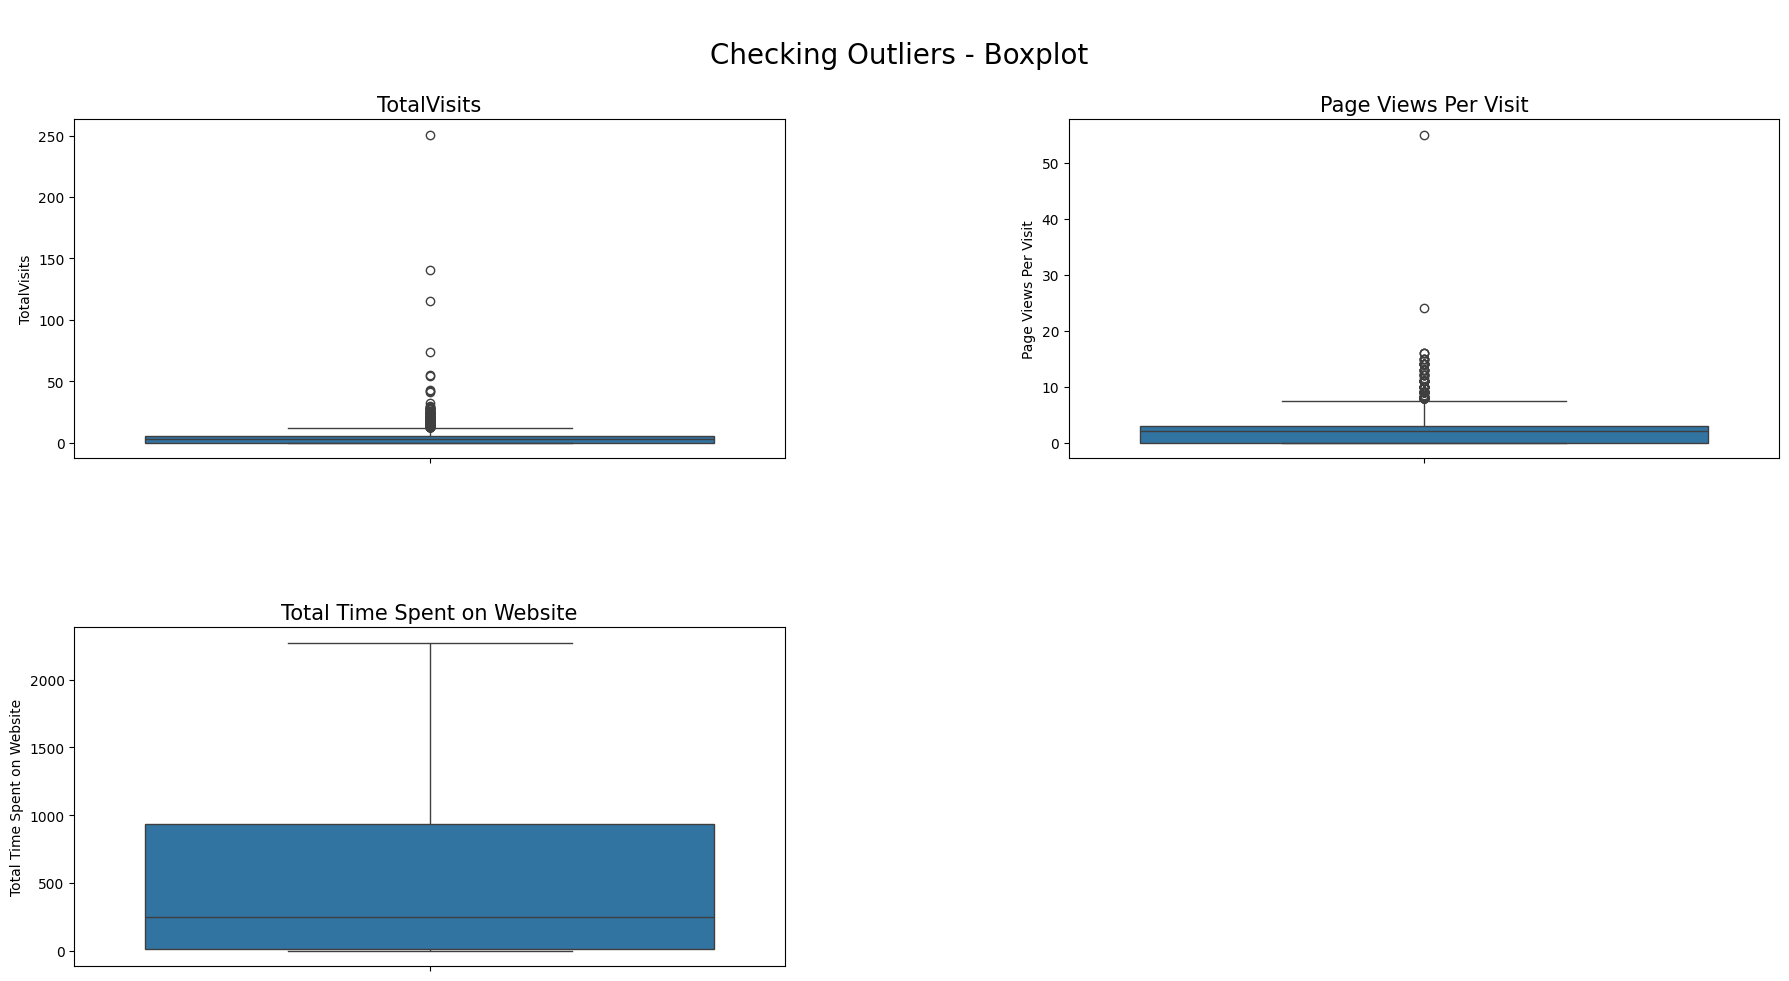

In [39]:
# Checking outliers

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
outlier_check(df_leads,num_cols)

**Insight**

- There are outliers in "TotalVisits" and "Page Views Per Visit". Remove using capping and flooring.

In [40]:
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000  9240.000000                  9240.000000           9240.000000
mean      0.385390     3.394156                   487.698268              2.327787
std       0.486714     4.836682                   548.021466              2.164258
min       0.000000     0.000000                     0.000000              0.000000
10%       0.000000     0.000000                     0.000000              0.000000
25%       0.000000     0.000000                    12.000000              0.000000
50%       0.000000     3.000000                   248.000000              2.000000
75%       1.000000     5.000000                   936.000000              3.000000
95%       1.000000    10.000000                  1562.000000              6.000000
max       1.000000   251.000000                  2272.000000             55.000000

In [41]:
# Defining UDF for outlier treatment

def outlier(df,col_list):
    for col in col_list:
        q1 = df[col].describe()["25%"]
        q3 = df[col].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        df[col] = np.where(df[col] > upper_bound, upper_bound,df[col]) # capping

        df[col] = np.where(df[col] < lower_bound, lower_bound,df[col]) # flooring

In [42]:
# Removing outliers from numerical variables other than target variable

outlier_cols = ["TotalVisits","Page Views Per Visit"]
outlier(df_leads,outlier_cols)

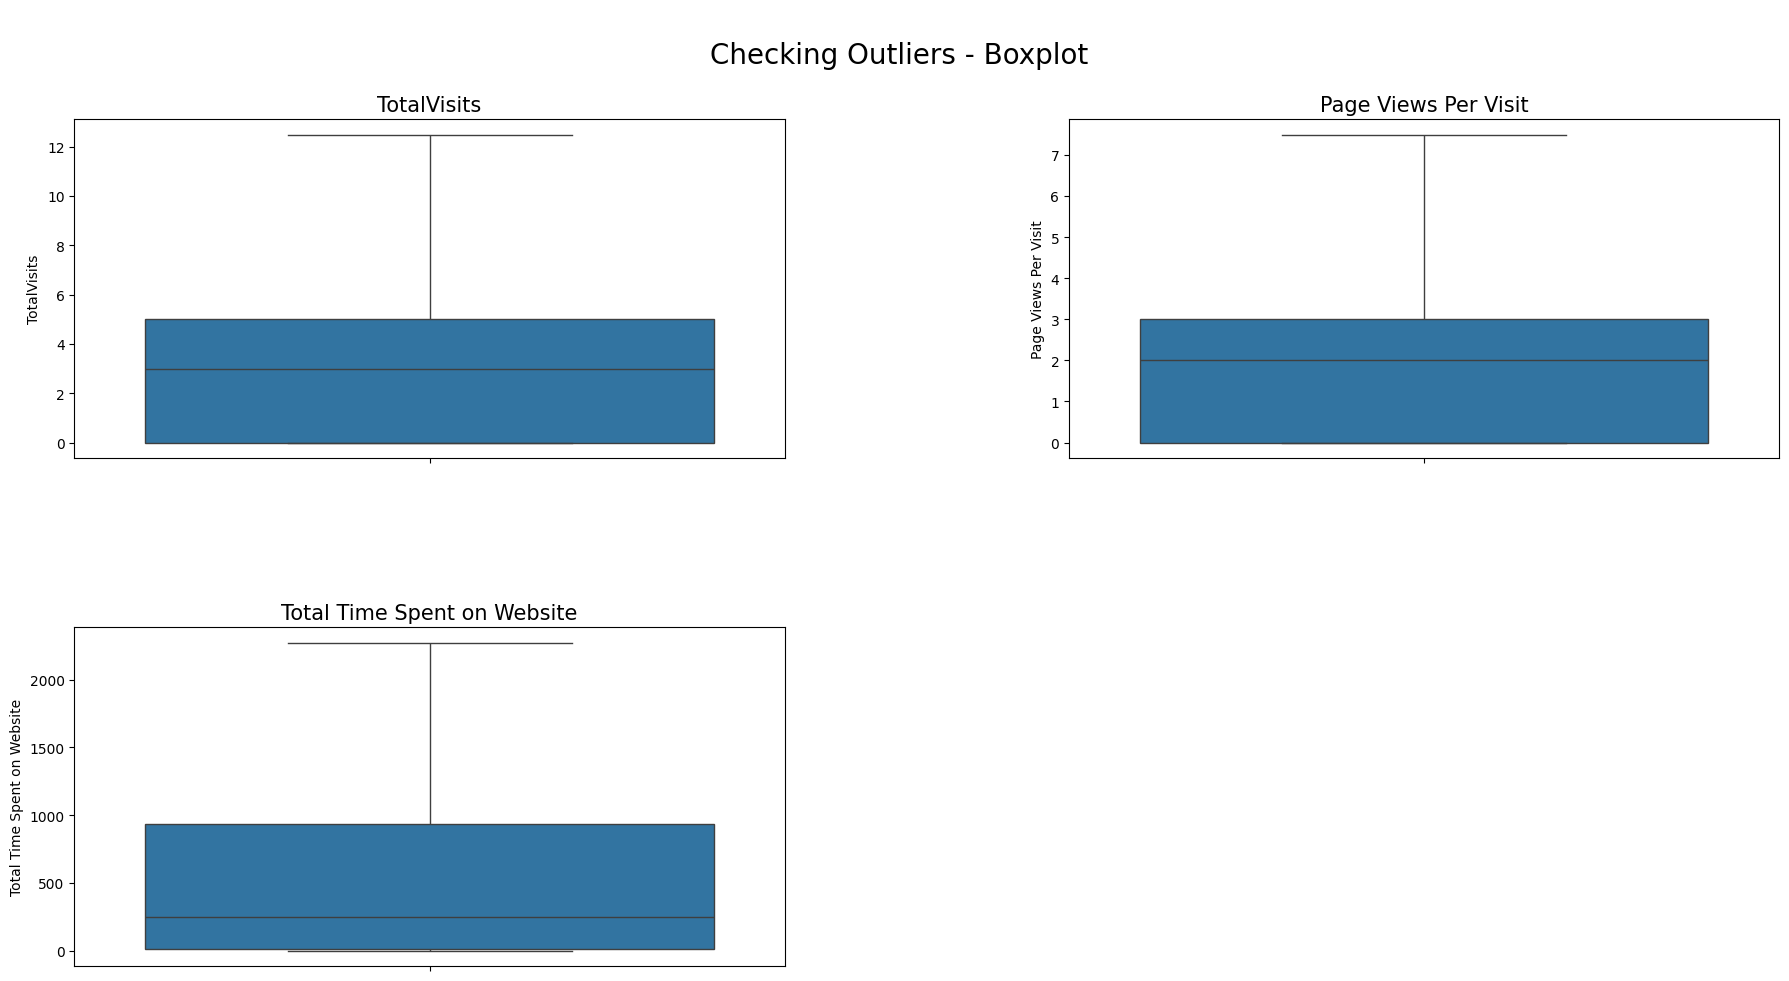

In [43]:
# Checking Boxplot after removing outliers
outlier_check(df_leads,num_cols)

### Grouping low frequency values, Renaming and Mapping

In [44]:
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  \
0                      API      Olark Chat           No          0          0.0   
1                      API  Organic Search           No          0          5.0   
2  Landing Page Submission  Direct Traffic           No          1          2.0   
3  Landing Page Submission  Direct Traffic           No          0          1.0   
4  Landing Page Submission          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation A free copy of Mastering The Interview  
0                   Others                      Unemployed                                     No  
1                   Others                      Unemployed                                     No  
2  Business Administration                         Student                                    Yes  
3    Media and Advertising                      Unemployed                                     No  
4                   Others                      Unemployed                                     No

In [45]:
group_cat_cols = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization","What is your current occupation","A free copy of Mastering The Interview"]

for col in group_cat_cols:
        perc=100*df_leads[col].value_counts(normalize=True)
        print("value_counts % for :",col,"\n")
        print(perc,"\n")
        print("_ _"*20,"\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _ 

value_counts % for : Lead Source 

Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
Pay per Click Ads     0.010823
blog                  0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
testone               0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: 

**Insights**

- Some categories in "Lead Score" and "Last Activity" columns have very few records. We can group these categories together under "Others".
- We can also rename "Free_copy" from "A free copy of Mastering The Interview" and "Current_occupation" from "What is your current occupation" for readability.
- "Do Not Email" & "Free_copy" both are binary categorical columns. We can map both of them yes/no to 1/0.

In [46]:
# Grouping low frequency values to Others

df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation',
                                                               'Approached upfront',
                                                               'View in browser link Clicked',
                                                               'Email Marked Spam',
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

print(df_leads["Lead Source"].value_counts(normalize=True)*100)
print(df_leads['Last Activity'].value_counts(normalize=True)*100)

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64


**Renaming Columns**

In [47]:
# "Free_copy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

#"Current_occupation" from "What is your current occupation"
df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

**Mapping categorical variables**

In [48]:
# Mapping binary categorical variables 'Do Not Email' and 'Free_copy' (Yes/No to 1/0)

df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [49]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


**The data is clean and now suitable for analysis.**

## EDA

### Data Imbalance

- Checking data imbalance in context of Target variable i.e, 'Converted.

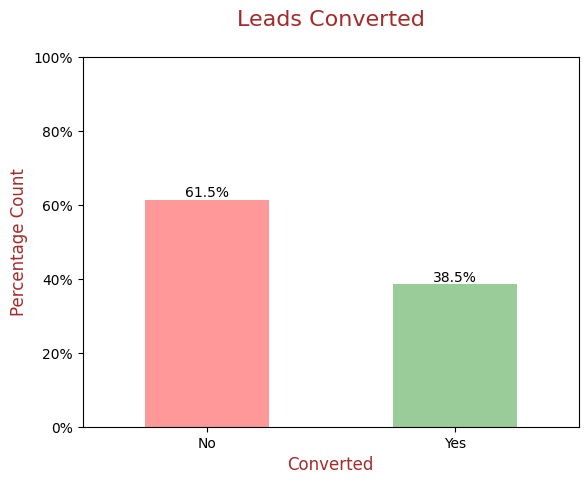

In [50]:
# ploting the results on bar plot

ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Red","Green"],alpha=0.4)

# Title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Brown'})

# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

In [51]:
# Imbalance ratio

imbalance_ratio = (df_leads['Converted'].value_counts(normalize = True).loc[0])/(df_leads['Converted'].value_counts(normalize = True).loc[1])
print("Data Imbalance Ratio -> {:.2f} : {}".format(imbalance_ratio,1))

Data Imbalance Ratio -> 1.59 : 1


**Insights**

- Conversion rate for is only 38.5% which is not good for business. We have to improve this rate.
- The imbalance ratio is 1.59.

### Univariate Analysis

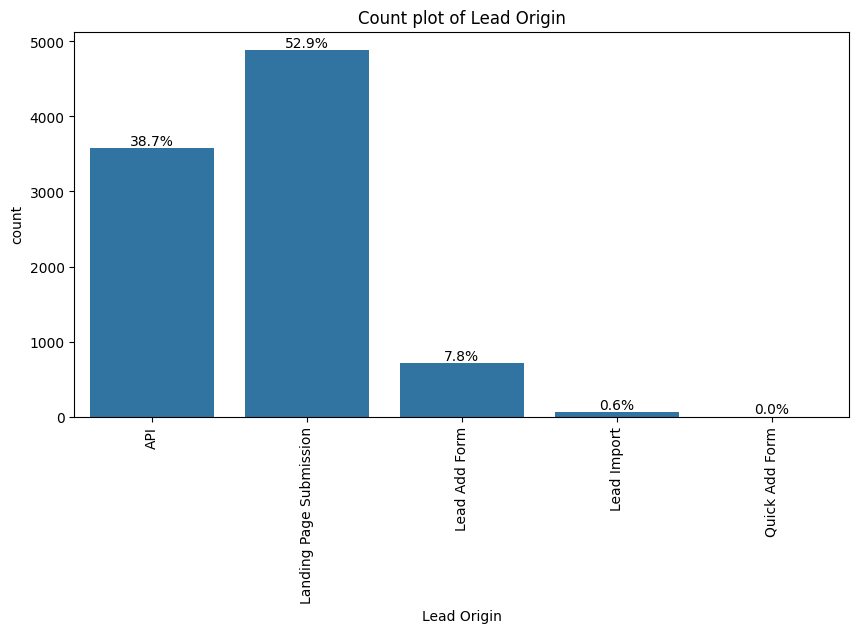

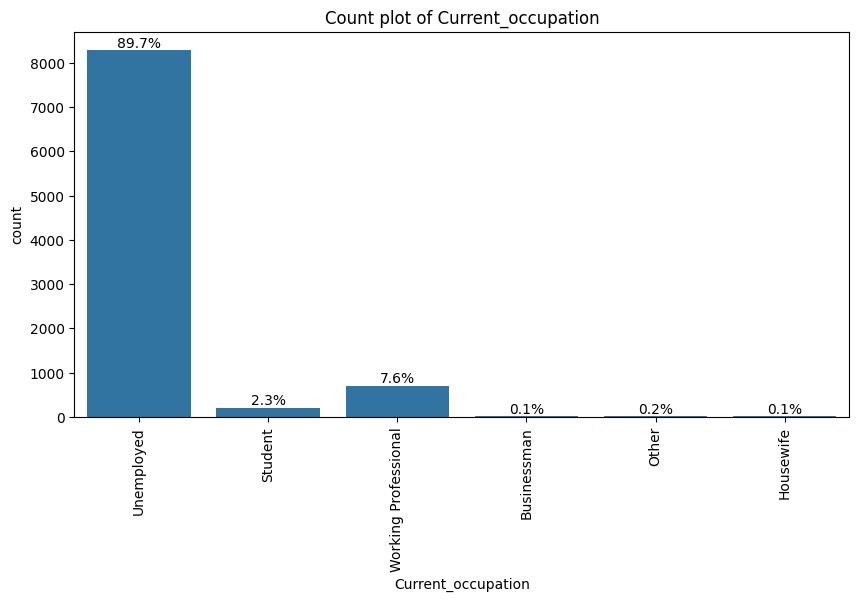

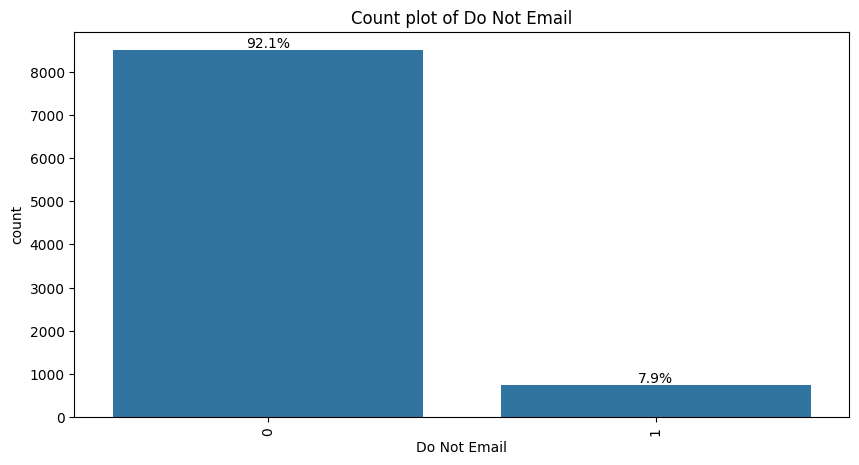

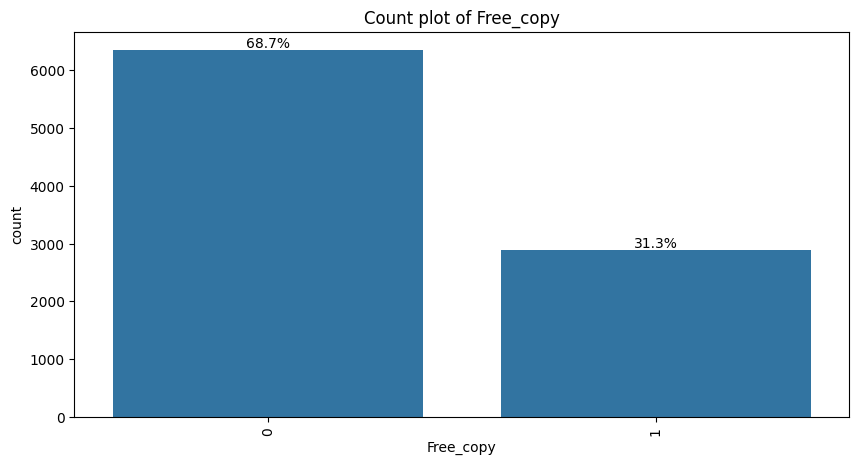

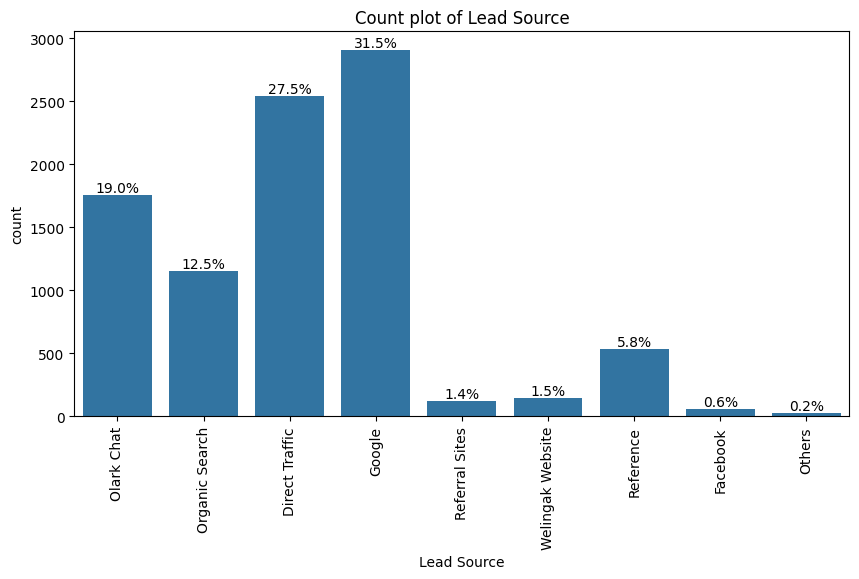

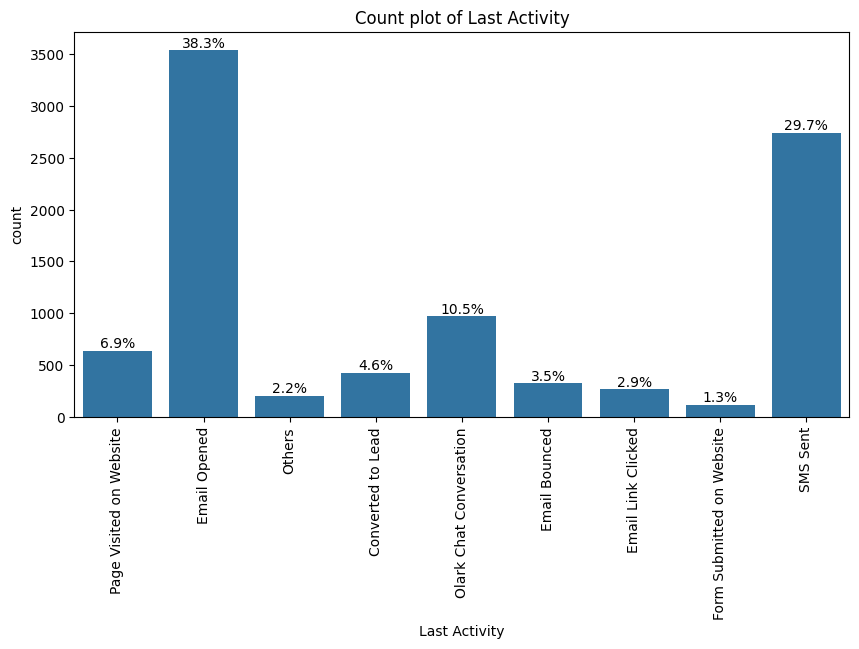

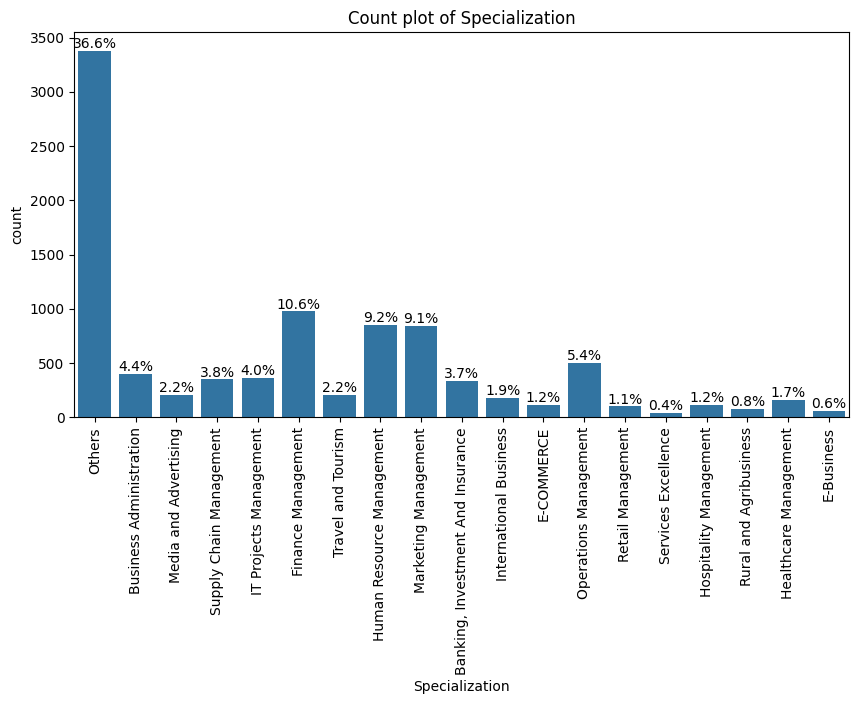

In [52]:
categorical_cols = ["Lead Origin","Current_occupation","Do Not Email","Free_copy","Lead Source","Last Activity","Specialization"]

for i in categorical_cols:
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i))
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)

    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

**Conclusion :**

- **Lead Origin:** "Landing Page Submission" identified 53% customers following "API" with 39%.
- **Current_occupation:** 90% of the leads are listed as 'Unemployed'.
- **Do Not Email:** 92% of the people has opted that they dont want to be emailed.
- **Free copy:** 68.7% leads do not want copy of "Mastering the interview".
- **Lead Source:** 58% leads are from Google & Direct Traffic combined.
- **Last Activity:** SMS Sent & Email Opened constitute 68% of leads.
- **Specialization:** Leads having Finance, HR and marketing management as specialization are the top contributing categories. (We are ignoring "Others" as we imputed null values with it)

### Bivariate Analysis

#### Categorical columns

In [53]:
def plot_bi(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))

    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df_leads,palette="prism_r",alpha=0.46)

    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")

    # Annotation
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

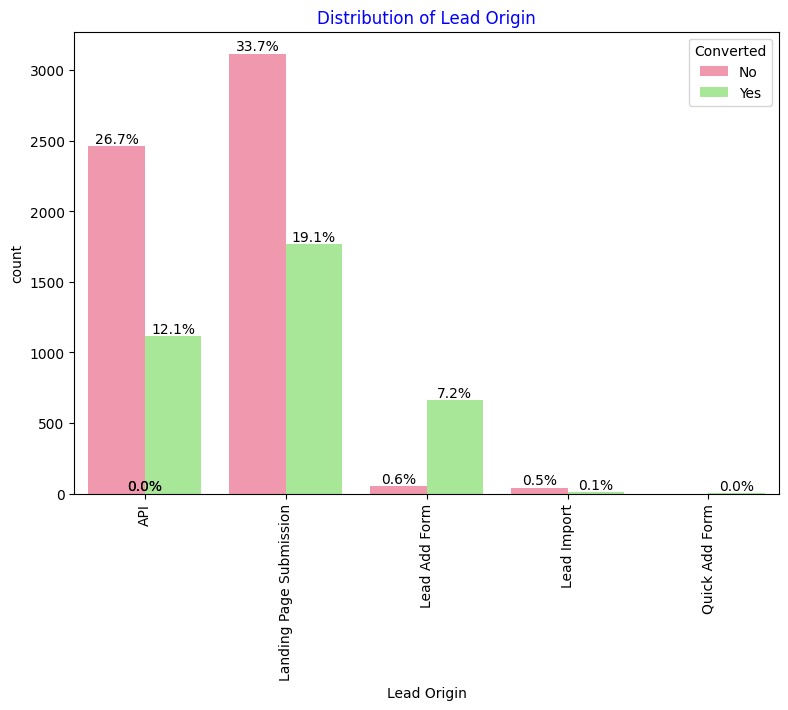

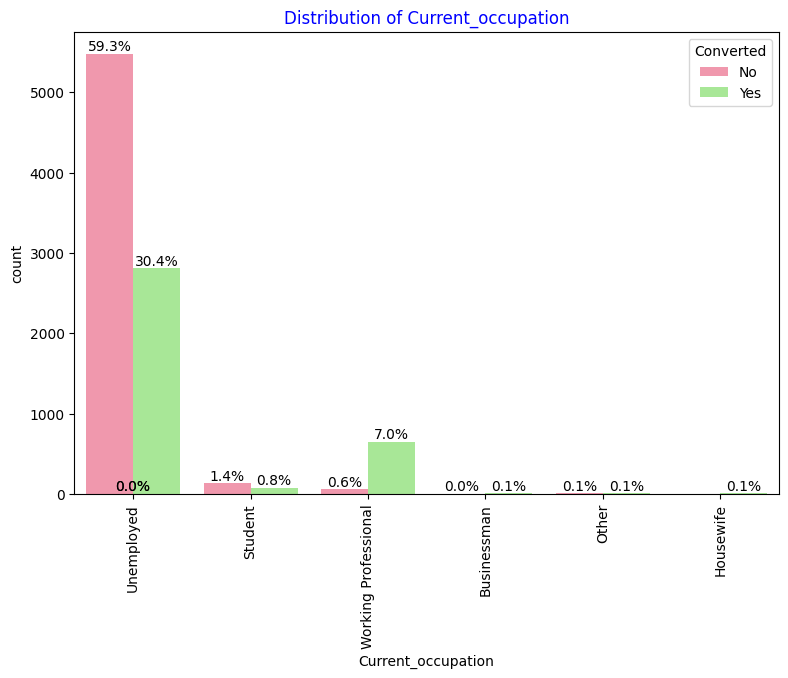

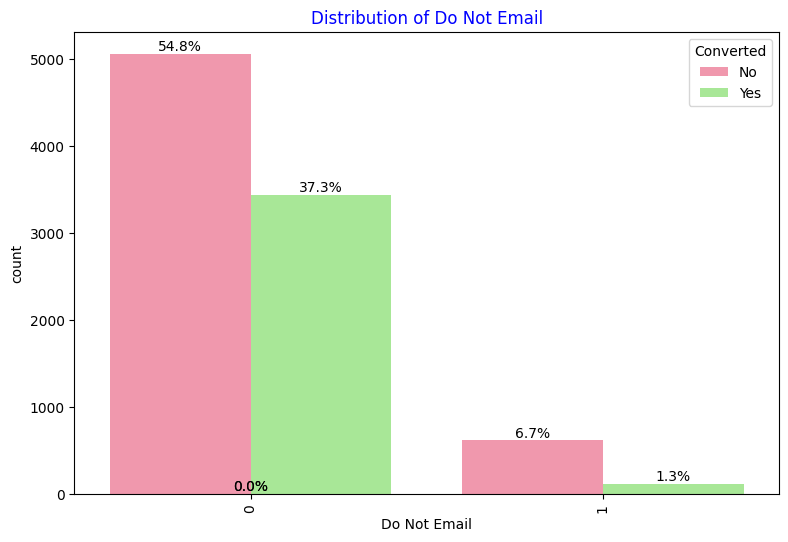

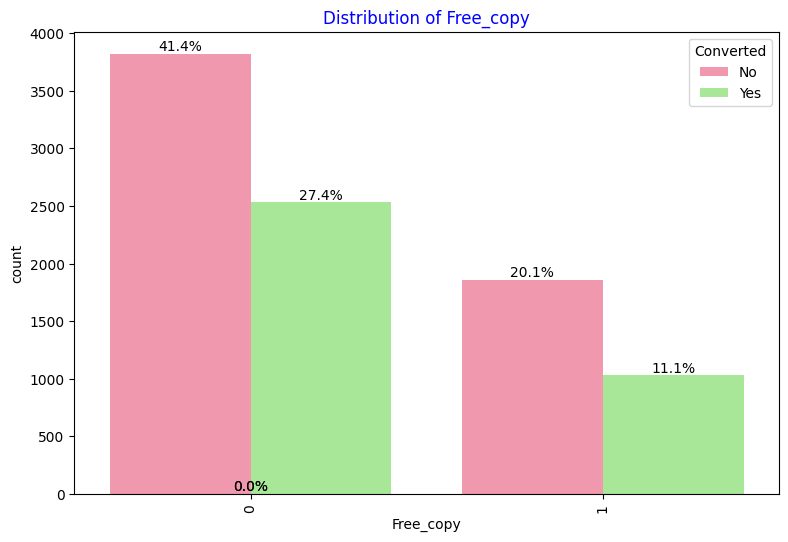

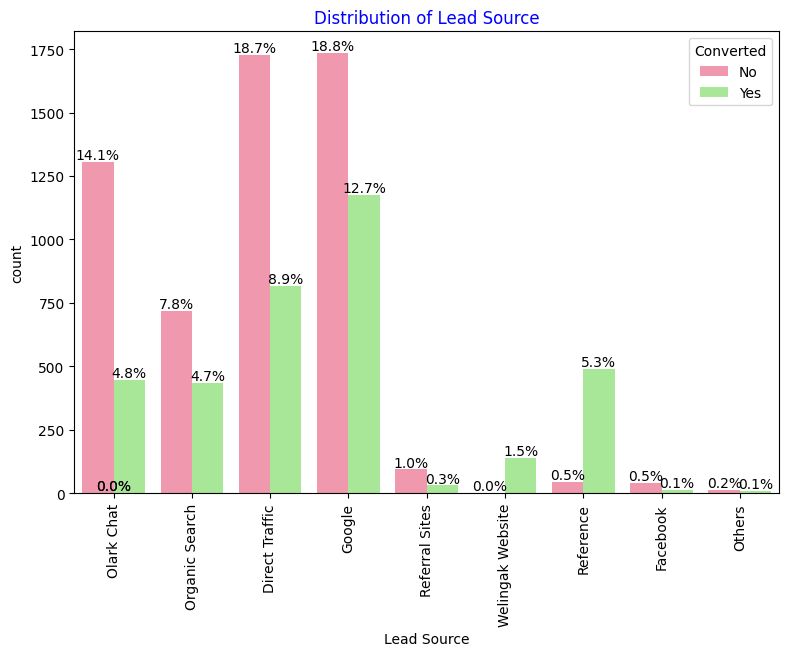

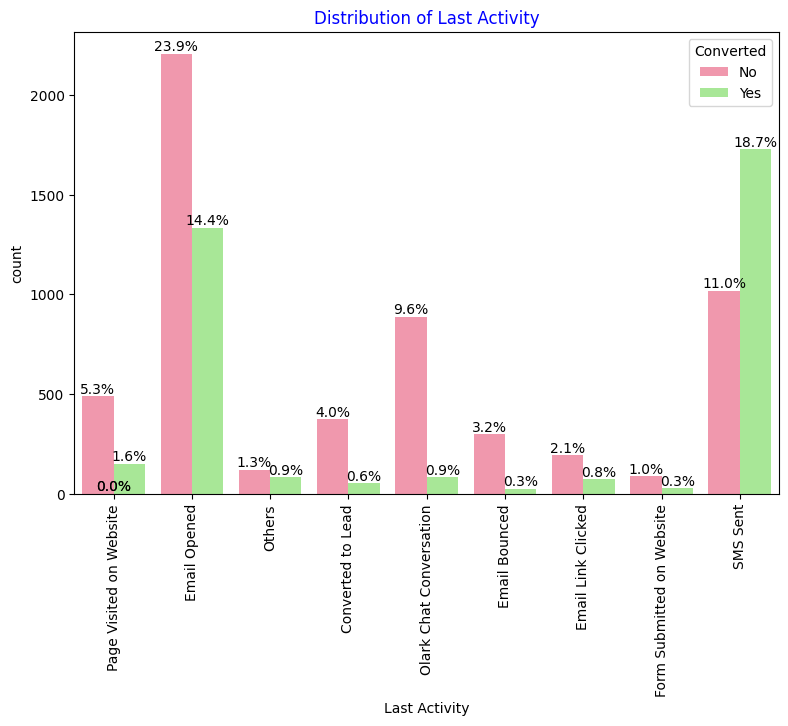

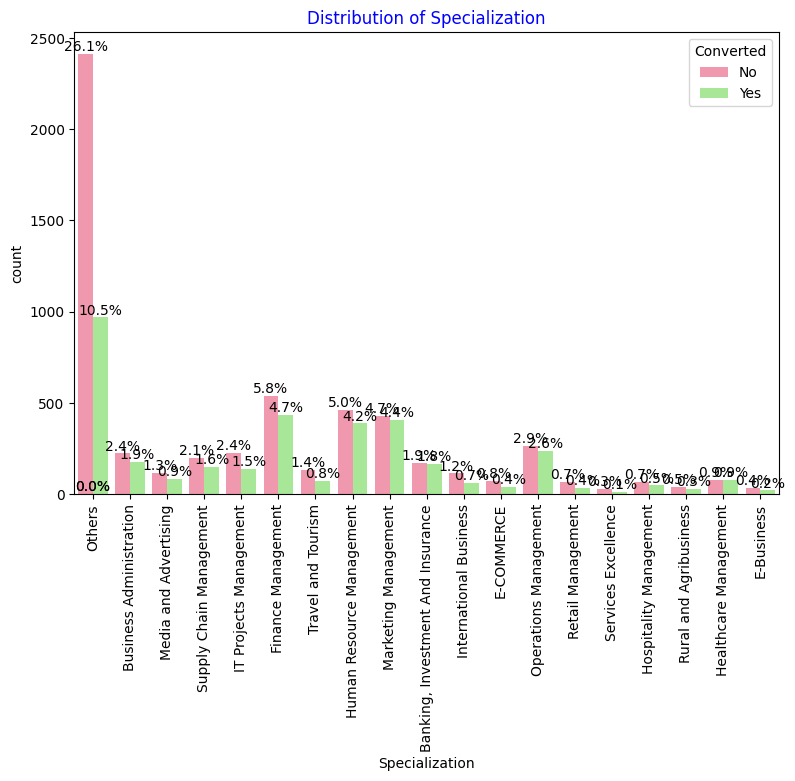

In [54]:
# Bivariate Analysis for all categorical varibles

for i in categorical_cols:
    plot_bi(df_leads,variable_name=i)

**Insights:**

- **Lead Origin:** Around 30% of leads converted successfully originate from "Landing page Submission" and "API".

- **Current_occupation:** Approximately 90% of the customers are Unemployed with 30% overall conversion. While Working Professional contribute only 7.6% of total customers with almost 7% overall conversion.

- **Do Not Email:** 92% of the people has opted that they dont want to be emailed about the course.

- **Lead Source:** Google and Direct Traffic contribute to 21% leads converted. Notably, Welingak Website and Referance contribute less traffic but have very high conversion rate of above 90%.

- **Last Activity:** 'SMS Sent' has high lead conversion rate with 18.7% leads converted, 'Email Opened' contribute around 40% of leads but only around 35% are converted from them i.e, 14.4%.

- **Specialization:** Conversion rate is evenly soread across categories but Marketing Managemt,HR Management and Finance Management has the highest contrbution.

#### Numerical columns

<Figure size 1600x400 with 0 Axes>

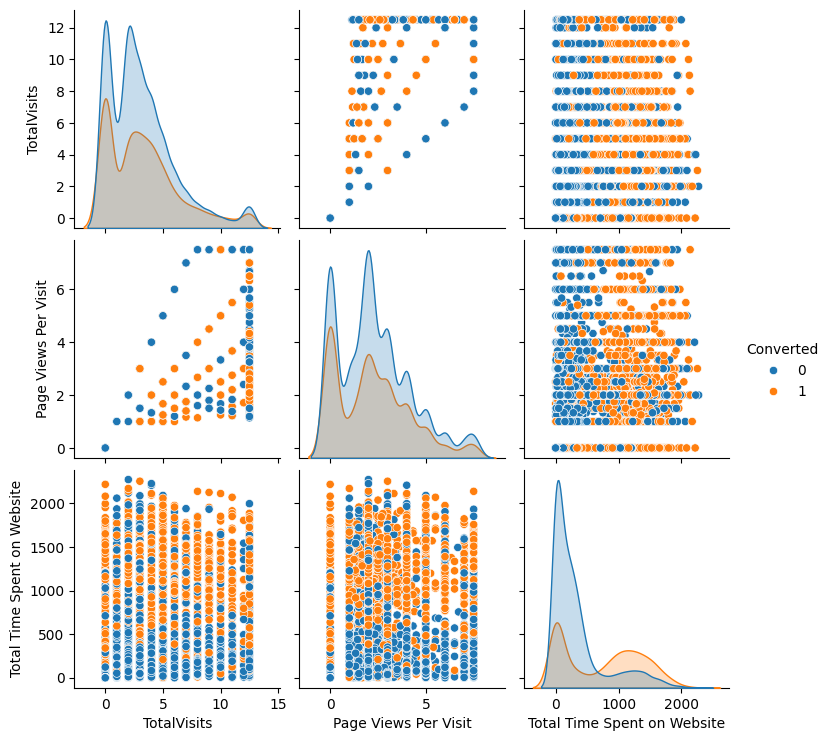

In [55]:
# Plotting pairplot

plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")
plt.show()

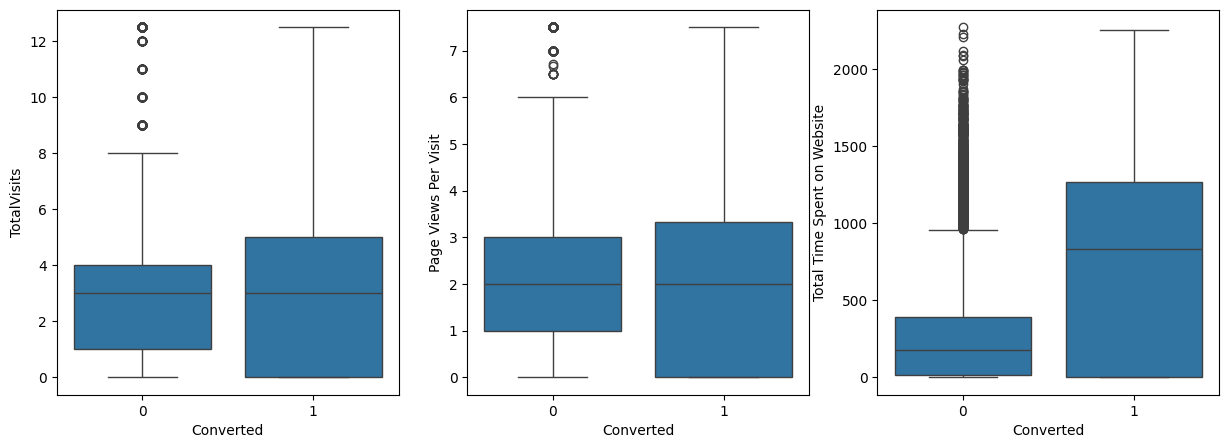

In [56]:
# Boxplot for numerical columns

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)

plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)

plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)

plt.show()

- Leads which spent more time on website on an average are more likely to be converted.

## Data Preparation

### Dummy Variables

In [57]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  TotalVisits  \
0                      API      Olark Chat             0          0          0.0   
1                      API  Organic Search             0          0          5.0   
2  Landing Page Submission  Direct Traffic             0          1          2.0   
3  Landing Page Submission  Direct Traffic             0          0          1.0   
4  Landing Page Submission          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0                   Others   
4                         1428                   1.0        Converted to Lead   

            Specialization Current_occupation  Free_copy  
0                   Others         Unemployed          0  
1                   Others         Unemployed          0  
2  Business Administration            Student          1  
3    Media and Advertising         Unemployed          0  
4                   Others         Unemployed          0

In [58]:
# Creating dummy variables
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source",'Do Not Email',"Last Activity","Specialization","Current_occupation","Free_copy"]], drop_first=True)

# Merging results
df_leads = pd.concat([df_leads, dummy], axis=1)

In [59]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  TotalVisits  \
0                      API      Olark Chat             0          0          0.0   
1                      API  Organic Search             0          0          5.0   
2  Landing Page Submission  Direct Traffic             0          1          2.0   
3  Landing Page Submission  Direct Traffic             0          0          1.0   
4  Landing Page Submission          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0                   Others   
4                         1428                   1.0        Converted to Lead   

            Specialization Current_occupation  Free_copy  Do Not Email  Free_copy  \
0                   Others         Unemployed          0             0          0   
1                   Others         Unemployed          0             0          0   
2  Business Administration            Student          1             0          1   
3    Media and Advertising         Unemployed          0             0          0   
4                   Others         Unemployed          0             0          0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                                    0                          0                        0   
1                                    0                          0                        0   
2                                    1                          0                        0   
3                                    1                          0                        0   
4                                    1                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
0                           0                     0                   0                       1   
1                           0                     0                   0                       0   
2                           0                     0                   0                       0   
3                           0                     0                   0                       0   
4                           0                     0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                           0                             0                            0   
1                           0                             0                            0   
2                           0                             0                            0   
3                           0                             0                            0   
4                           0                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4      

In [60]:
# Dropping columns with Dummy variables created

df_leads = df_leads.drop(["Lead Origin","Lead Source",'Do Not Email',"Last Activity","Specialization","Current_occupation","Free_copy"],1)

In [61]:
df_leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                                    0                          0                        0   
1                                    0                          0                        0   
2                                    1                          0                        0   
3                                    1                          0                        0   
4                                    1                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
0                           0                     0                   0                       1   
1                           0                     0                   0                       0   
2                           0                     0                   0                       0   
3                           0                     0                   0                       0   
4                           0                     0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                           0                             0                            0   
1                           0                             0                            0   
2                           0                             0                            0   
3                           0                             0                            0   
4                           0                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  \
0                                        0                                      0   
1                                        0                                      0   
2                                        0                                      0   
3                                        0                                      0   
4                                        0                                      0   

   Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                     0                                      1                       0   
1                     0                                      0                       0   
2                     0                                      0                       0   
3                     1                                      0                

### Train - Test Split

In [62]:
# Predictor variables to X
X = df_leads.drop('Converted', axis=1)

# Target variables to y
y = df_leads["Converted"]

# Split data into train and test (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [63]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape,"\n")
print("___"*40,"\n")
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_train: (6468, 46) 
y_train: (6468,) 

________________________________________________________________________________________________________________________ 

X_test: (2772, 46) 
y_test: (2772,)


### Scaling

In [64]:
# using MinMax scaler for sclaing

scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1871         0.00                     0.000000              0.000000   
6795         0.32                     0.214349              0.177333   
3516         0.40                     0.046655              0.333333   
8105         0.40                     0.541373              0.666667   
3934         0.00                     0.000000              0.000000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                                    0                          0                        0   
6795                                    1                          0                        0   
3516                                    0                          0                        0   
8105                                    1                          0                        0   
3934                                    0                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
1871                           0                     0                   0   
6795                           0                     0                   0   
3516                           0                     0                   0   
8105                           0                     0                   1   
3934                           0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1871                       1                           0                   0   
6795                       0                           0                   0   
3516                       1                           0                   0   
8105                       0                           0                   0   
3934                       1                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  \
1871                      0                           0                             0   
6795                      0                           0                             0   
3516                      0                           0                             0   
8105                      0                           0                             0   
3934                      0                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1871                            0                                 0                           1   
6795                            0                                 0                           1   
3516                            0                                 0                           1   
8105                            0                                 0                           0   
3934                            0                                 0                           1   

      Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  \
1871                                        0                                      0   
6795                                        0                                      0   
3516                                        0                                      0   
8105                                        0                                      0   
3934                                        0                                      0   

      Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
1871                     0                                      0                       0   
6795                     0                                      0                       0   
3516                     0                                      0                       0   
8105     

#### Correlation

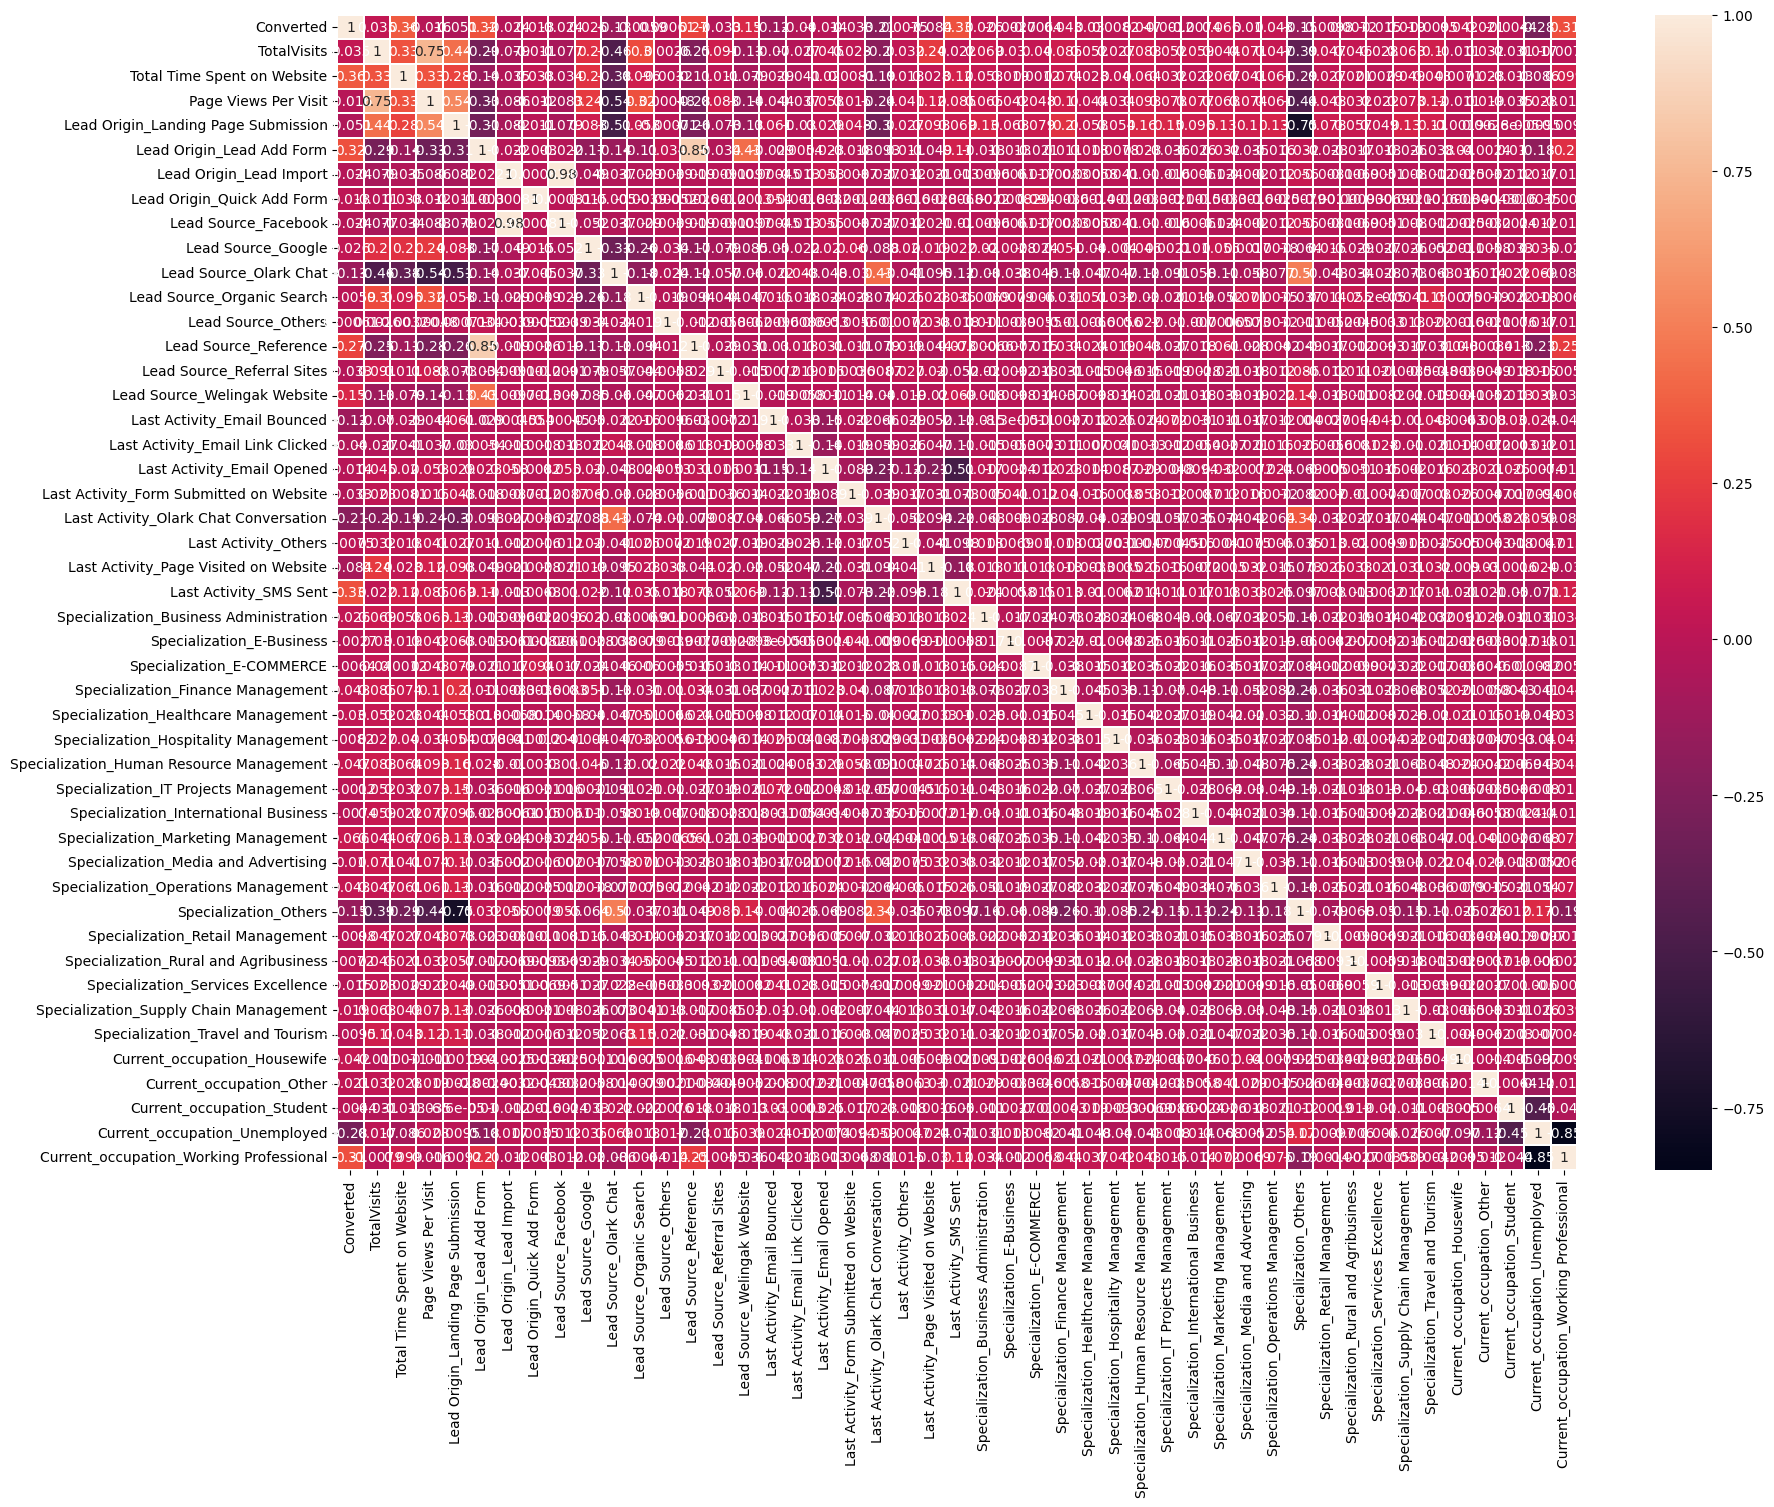

In [65]:
# correlation matrix - Heatmap

plt.figure(figsize = (20,15))
sns.heatmap(df_leads.corr(),linewidths=0.01,annot=True)
plt.show()

- "Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form" and "Lead Source_Reference" are highly correlated, so we can drop any two. Choosing, "Lead Source_Facebook" and "Lead Origin_Lead Import" to drop based on EDA.

In [66]:
# Dropping column from train and test data

X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## Model Building

### Feature Selection Using RFE

In [67]:
# RFE to reduce variables

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)   # RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

#Output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 20),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', False, 3),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 14),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 13),
 ('Specialization_E-Business', False, 27),
 ('Speciali

In [68]:
# Columns selected by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [69]:
# UDF for calculating VIFs for variables

def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1

In [70]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Creating model
X_train_sm1 = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.2
Date:                Tue, 19 Mar 2024   Deviance:                       5418.3
Time:                        10:40:14   Pearson chi2:                 8.20e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

- Remove Current_occupation_Housewife as it has high p value of 0.999

In [71]:
# Dropping 'Current_occupation_Housewife' column

rfe_col=rfe_col.drop("Current_occupation_Housewife")

### Model 2

In [72]:
X_train_rfe = X_train[rfe_col]
X_train_sm2 = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2717.2
Date:                Tue, 19 Mar 2024   Deviance:                       5434.4
Time:                        10:40:20   Pearson chi2:                 8.24e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3869
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

- Remove Lead Source_Others as it has high p value of 0.050.

In [73]:
# Dropping "Lead Source_Others" column

rfe_col=rfe_col.drop("Lead Source_Others")

### Model 3

In [74]:
X_train_rfe = X_train[rfe_col]
X_train_sm3 = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2719.0
Date:                Tue, 19 Mar 2024   Deviance:                       5438.1
Time:                        10:40:26   Pearson chi2:                 8.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3865
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

- p-values are within threshold (p-values < 0.05). Check VIF.

In [75]:
# Checking VIFs for the Model 3

get_vif(X_train_rfe)

Features   VIF
0                      Page Views Per Visit  6.58
1                               TotalVisits  4.77
2       Lead Origin_Landing Page Submission  3.71
3                     Specialization_Others  2.42
4                Last Activity_Email Opened  2.18
5               Total Time Spent on Website  2.11
6                    Last Activity_SMS Sent  2.09
7                    Lead Source_Olark Chat  1.91
8                     Lead Source_Reference  1.29
9   Current_occupation_Working Professional  1.22
10             Lead Source_Welingak Website  1.10
11                     Last Activity_Others  1.07
12    Specialization_Hospitality Management  1.02

- Page Views Per Visit have VIF>5, so it has to be removed.

In [76]:
# Dropping "Page Views Per Visit" column

rfe_col=rfe_col.drop("Page Views Per Visit")

### Model 4

In [77]:
X_train_rfe = X_train[rfe_col]
X_train_sm4 = sm.add_constant(X_train_rfe)
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.5
Date:                Tue, 19 Mar 2024   Deviance:                       5473.0
Time:                        10:40:33   Pearson chi2:                 8.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3832
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [78]:
# Checking VIFs for the Model 4

get_vif(X_train_rfe)

Features   VIF
0       Lead Origin_Landing Page Submission  3.21
1                               TotalVisits  2.84
2                     Specialization_Others  2.35
3               Total Time Spent on Website  2.11
4                Last Activity_Email Opened  2.11
5                    Last Activity_SMS Sent  2.01
6                    Lead Source_Olark Chat  1.84
7                     Lead Source_Reference  1.27
8   Current_occupation_Working Professional  1.22
9              Lead Source_Welingak Website  1.09
10                     Last Activity_Others  1.07
11    Specialization_Hospitality Management  1.02

- Model 4 is the final model with all parameters under requirement.
- p-values < 0.05 and VIF < 5

## Model Evaluation

In [79]:
# Getting the predicted values on the train set

y_train_pred = logm4.predict(X_train_sm4)

In [80]:
# Creating array

y_train_pred = y_train_pred.values.reshape(-1)

In [81]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.443856         1871          0
1          0        0.074362         6795          0
2          0        0.297257         3516          0
3          0        0.777329         8105          1
4          0        0.199327         3934          0

### Confusion Matrix

In [82]:
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3575  427]
 [ 840 1626]]


### Accuracy

In [83]:
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8041125541125541


### Sensitivity and Specificity

In [84]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [85]:
#Sensitivity

print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6593673965936739


In [86]:
# Specificity

print("Specificity :",TN / float(TN+FP))

Specificity : 0.8933033483258371


### ROC Curve

In [87]:
def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

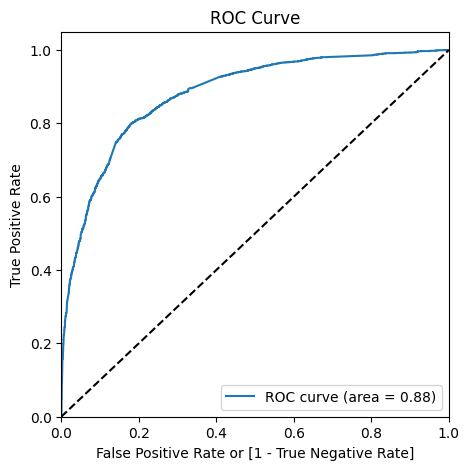

In [89]:
# ROC plot

roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

#### Optimal cutoff

In [90]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0          0        0.443856         1871          0    1    1    1    1    1    0    0    0    0   
1          0        0.074362         6795          0    1    0    0    0    0    0    0    0    0   
2          0        0.297257         3516          0    1    1    1    0    0    0    0    0    0   
3          0        0.777329         8105          1    1    1    1    1    1    1    1    1    0   
4          0        0.199327         3934          0    1    1    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [91]:
# Accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.602814  0.972425  0.375062
0.2   0.2  0.751237  0.897405  0.661169
0.3   0.3  0.791589  0.833739  0.765617
0.4   0.4  0.814935  0.767234  0.844328
0.5   0.5  0.804113  0.659367  0.893303
0.6   0.6  0.797310  0.592052  0.923788
0.7   0.7  0.778602  0.506488  0.946277
0.8   0.8  0.755257  0.408354  0.969015
0.9   0.9  0.708720  0.251419  0.990505


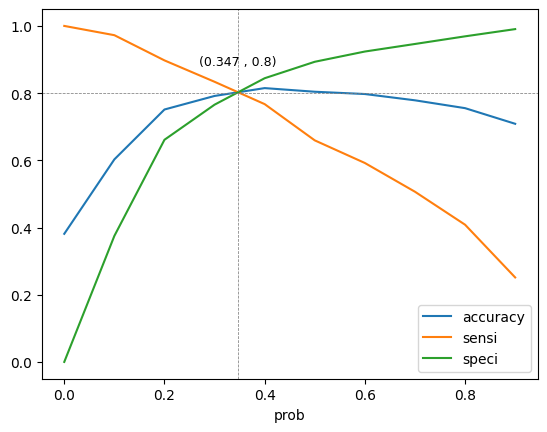

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves

sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves

speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points

intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point

accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point

cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates

plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot

plt.show()

- **0.347 is the optimal cutoff**

In [93]:
# Re-mapping using optimal cutoff

y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

In [94]:
# deleting the unwanted columns

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.443856         1871                1
1          0        0.074362         6795                0
2          0        0.297257         3516                0
3          0        0.777329         8105                1
4          0        0.199327         3934                0

### All metrices for Train set

In [95]:
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]

    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)

    FPR = FP/(FP + TN)
    FNR = FN/(FN +TP)

    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP)

    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [96]:
# Confusion metrics for 'y_train_pred_final'

confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# All metrices of logistic regression

logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3240  762]
 [ 476 1990]] 

************************************************** 

True Negative                    :  3240
True Positive                    :  1990
False Negative                   :  476
False Positve                    :  762
Model Accuracy                   :  0.8086
Model Sensitivity                :  0.807
Model Specificity                :  0.8096
Model Precision                  :  0.7231
Model Recall                     :  0.807
Model True Positive Rate (TPR)   :  0.807
Model False Positive Rate (FPR)  :  0.1904


************************************************** 



### Precision and Recall

In [97]:
# Creating precision-recall tradeoff curve

y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

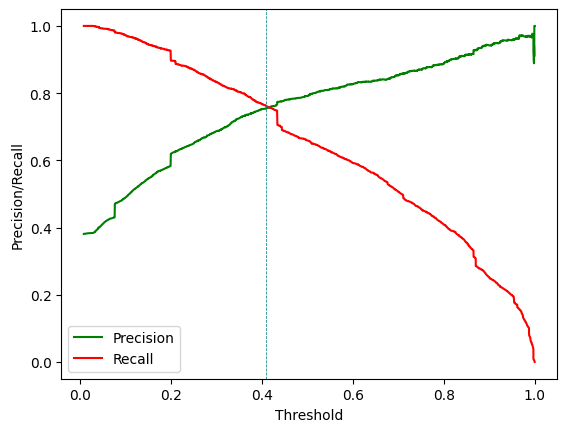

In [98]:
# plot precision-recall tradeoff curve

plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

- The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement. Here our probability threshold is 0.41 aprrox from above curve.

In [99]:
# copying df to test model evaluation with precision recall threshold of 0.41

y_train_precision_recall = y_train_pred_final.copy()

In [100]:
# sensitivity-specificity vs precision-recall

y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  final_predicted  precision_recall_prediction
0          0        0.443856         1871                1                            1
1          0        0.074362         6795                0                            0
2          0        0.297257         3516                0                            0
3          0        0.777329         8105                1                            1
4          0        0.199327         3934                0                            0

In [101]:
## all matrics at 0.41 cutoff in precision-recall view

confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")
print("Confusion Matrix")
print(confusion_matrix,"\n")
print("*"*50,"\n")
logreg_all_metrics(confusion_matrix)
print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3393  609]
 [ 590 1876]] 

************************************************** 

True Negative                    :  3393
True Positive                    :  1876
False Negative                   :  590
False Positve                    :  609
Model Accuracy                   :  0.8146
Model Sensitivity                :  0.7607
Model Specificity                :  0.8478
Model Precision                  :  0.7549
Model Recall                     :  0.7607
Model True Positive Rate (TPR)   :  0.7607
Model False Positive Rate (FPR)  :  0.1522


************************************************** 



**Insights:**

- For cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75%, we need it close to 80% as the Business Objective.

- So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

### Adding Lead Score Feature

In [102]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.443856         1871                1          44
1          0        0.074362         6795                0           7
2          0        0.297257         3516                0          30
3          0        0.777329         8105                1          78
4          0        0.199327         3934                0          20

## Making Predictions

#### Scaling test data

In [105]:
# scaling columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

In [106]:
X_test = X_test[rfe_col]
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269         0.64                     0.444982                                    0   
2376         0.00                     0.000000                                    0   
7766         0.40                     0.025968                                    0   
9199         0.00                     0.000000                                    0   
4359         0.00                     0.000000                                    0   

      Lead Source_Olark Chat  Lead Source_Reference  Lead Source_Welingak Website  \
4269                       0                      0                             0   
2376                       0                      1                             0   
7766                       0                      0                             0   
9199                       1                      0                             0   
4359                       0                      1                             0   

      Last Activity_Email Opened  Last Activity_Others  Last Activity_SMS Sent  \
4269                           0                     0                       1   
2376                           0                     0                       1   
7766                           0                     1                       0   
9199                           0                     0                       0   
4359                           1                     0                       0   

      Specialization_Hospitality Management  Specialization_Others  \
4269                                      0                      1   
2376                                      0                      1   
7766                                      0                      0   
9199                                      0                      1   
4359                                      0                      0   

      Current_occupation_Working Professional  
4269                                        0  
2376                                        0  
7766                                        1  
9199                                        0  
4359                                        0

#### Prediction using Model 4

In [107]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = logm4.predict(X_test_sm)

In [108]:
# Predicted probability to dataframe
y_test_pred = pd.DataFrame(y_test_pred)

# y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.755893
1          1         2376  0.865101
2          1         7766  0.897444
3          0         9199  0.076275
4          1         4359  0.869986

In [109]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.755893
1         2376          1        0.865101
2         7766          1        0.897444
3         9199          0        0.076275
4         4359          1        0.869986

In [110]:
# Sensitivity-specificity method at 0.345 probability cutoff obtained from training

y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.755893                1
1         2376          1        0.865101                1
2         7766          1        0.897444                1
3         9199          0        0.076275                0
4         4359          1        0.869986                1

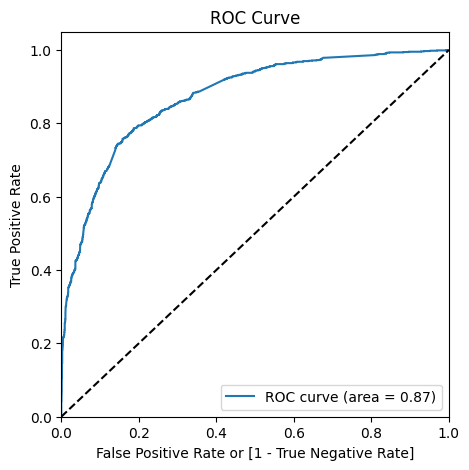

In [112]:
# ROC curve for Test Set

fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

#### Test Set Evaluation

In [113]:
# Confusion metrics for 'y_train_pred_final'

confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")
print("Confusion Matrix")
print(confusion_matrix,"\n")
print("*"*50,"\n")

# All metrices of logistic regression
logreg_all_metrics(confusion_matrix)
print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1340  337]
 [ 225  870]] 

************************************************** 

True Negative                    :  1340
True Positive                    :  870
False Negative                   :  225
False Positve                    :  337
Model Accuracy                   :  0.7973
Model Sensitivity                :  0.7945
Model Specificity                :  0.799
Model Precision                  :  0.7208
Model Recall                     :  0.7945
Model True Positive Rate (TPR)   :  0.7945
Model False Positive Rate (FPR)  :  0.201


************************************************** 



- **All the evaluation metrices for test set is close to that of train set i.e, ~80%.**
- We can now look at the coefficients.

In [114]:
print(logm4.params.sort_values(ascending=False))

Lead Source_Welingak Website               5.656737
Total Time Spent on Website                4.338266
Lead Source_Reference                      3.182821
Current_occupation_Working Professional    2.712793
Last Activity_SMS Sent                     2.226035
Last Activity_Others                       1.401533
Last Activity_Email Opened                 1.103569
Lead Source_Olark Chat                     1.056458
TotalVisits                                0.819276
Specialization_Hospitality Management     -1.085516
Specialization_Others                     -1.164978
Lead Origin_Landing Page Submission       -1.266641
const                                     -2.385554
dtype: float64


- A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.
- A high negative coefficient indicates that a variable has a strong negative influence on predicting the probability of leads.

#### Adding Lead Score

In [115]:
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.755893                1          76
1         2376          1        0.865101                1          87
2         7766          1        0.897444                1          90
3         9199          0        0.076275                0           8
4         4359          1        0.869986                1          87